# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=70)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=70)
# lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
# lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

54

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [5]:
City = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

units = "imperial"

print("Beginning Data Retrieval")
print("---------------------------")

for city in cities:
    query = (f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}")
    response = requests.get(query).json()
    
    try:
        City.append(response["name"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        Max_Temp.append(response["main"]["temp_max"])
        Humidity.append(response["main"]["humidity"])
        Cloudiness.append(response["clouds"]["all"])
        Wind_Speed.append(response["wind"]["speed"])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
    
        print(f'Processing {response["name"]}, city ID {response["id"]}')
        
    except:
        print("City not found. Skipping...")
    
    time.sleep(1)
    
print("---------------------------")
print("Data Retrieval Complete")
print("---------------------------")
    

Beginning Data Retrieval
---------------------------
Processing Coyhaique, city ID 3894426
Processing Port Alfred, city ID 964432
Processing Punta Arenas, city ID 3874787
Processing Chui, city ID 3443061
Processing Pochutla, city ID 3517970
Processing Mataura, city ID 6201424
Processing Chamonix, city ID 3027301
Processing Requena, city ID 2511930
Processing Vanavara, city ID 2013727
Processing Hobart, city ID 2163355
Processing Ushuaia, city ID 3833367
Processing Hasaki, city ID 2112802
Processing Sinjai, city ID 1626895
Processing Port Hardy, city ID 6111862
Processing Cherskiy, city ID 2126199
Processing Kapaa, city ID 5848280
Processing Butaritari, city ID 2110227
Processing Lorengau, city ID 2092164
Processing Kemijärvi, city ID 653272
Processing Saint-Philippe, city ID 935215
City not found. Skipping...
Processing Vaini, city ID 4032243
Processing Gillette, city ID 5826027
Processing Busselton, city ID 2075265
Processing Albany, city ID 5106841
City not found. Skipping...
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#Put city data in data frame
weather_data = pd.DataFrame({"City": City,
                            "Lat": Lat,
                            "Lng": Lng,
                            "Max Temp": Max_Temp,
                            "Humidity": Humidity,
                            "Cloudiness": Cloudiness,
                            "Wind Speed": Wind_Speed,
                            "Country": Country,
                            "Date": Date})

#Write city data to csv file and export
weather_data.to_csv(output_data_file, index = False)

#Display data frame
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Coyhaique,-45.5752,-72.0662,74.01,30,0,5.75,CL,1643142441
1,Port Alfred,-33.5906,26.8910,72.25,83,67,8.37,ZA,1643142442
2,Punta Arenas,-53.1500,-70.9167,51.91,50,75,29.93,CL,1643142355
3,Chui,-33.6971,-53.4616,83.03,70,93,10.49,UY,1643142444
4,Pochutla,15.7432,-96.4661,87.82,39,0,11.30,MX,1643142446


In [8]:
#Generate descriptive statistics for data frame
weather_summary = weather_data.describe()

#Display summary
weather_summary

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,4.900000e+01
mean,12.379906,8.164845,49.692653,77.326531,62.632653,9.657143,1.643142e+09
std,40.736527,106.138057,34.579710,15.751174,39.241079,8.128384,4.489961e+01
min,-54.800000,-175.200000,-42.430000,30.000000,0.000000,0.830000,1.643142e+09
25%,-21.358500,-73.820300,34.270000,68.000000,23.000000,4.610000,1.643142e+09
50%,13.216700,6.869300,61.090000,80.000000,75.000000,7.050000,1.643142e+09
75%,45.923800,112.382500,78.530000,88.000000,99.000000,11.360000,1.643142e+09
max,77.484000,172.790200,87.820000,100.000000,100.000000,34.520000,1.643143e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
try:
    weather_data_clean = weather_data.loc[weather_data["Humidity"] < 100]
    weather_data_clean.describe()
    
except:
    weather_summary
    pass

In [10]:
#  Get the indices of cities that have humidity over 100%.
humidity_indices = list(np.where(weather_data["Humidity"] >= 100)[0])

humidity_indices

[8, 14, 24]

In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data.drop(index = humidity_indices, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Coyhaique,-45.5752,-72.0662,74.01,30,0,5.75,CL,1643142441
1,Port Alfred,-33.5906,26.8910,72.25,83,67,8.37,ZA,1643142442
2,Punta Arenas,-53.1500,-70.9167,51.91,50,75,29.93,CL,1643142355
3,Chui,-33.6971,-53.4616,83.03,70,93,10.49,UY,1643142444
4,Pochutla,15.7432,-96.4661,87.82,39,0,11.30,MX,1643142446


In [14]:
#Format date from unix
clean_city_data["Date"] = clean_city_data["Date"].astype('int').astype("datetime64[s]")
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Coyhaique,-45.5752,-72.0662,74.01,30,0,5.75,CL,2022-01-25 20:27:21
1,Port Alfred,-33.5906,26.8910,72.25,83,67,8.37,ZA,2022-01-25 20:27:22
2,Punta Arenas,-53.1500,-70.9167,51.91,50,75,29.93,CL,2022-01-25 20:25:55
3,Chui,-33.6971,-53.4616,83.03,70,93,10.49,UY,2022-01-25 20:27:24
4,Pochutla,15.7432,-96.4661,87.82,39,0,11.30,MX,2022-01-25 20:27:26


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

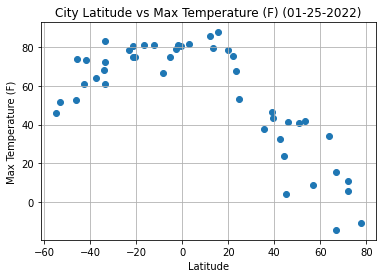

In [15]:
#Scatter plot function
def scatter(x_column, y_column, ylabel):
    x_values = clean_city_data[x_column]
    y_values = clean_city_data[y_column]
    plt.scatter(x_values,y_values)
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.title(f"""City Latitude vs {ylabel} ({clean_city_data.iloc[0,8].strftime('%m-%d-%Y')})""")
    plt.grid()
    plt.show()

#Scatter plot of latitude vs max temperature
scatter("Lat", "Max Temp", "Max Temperature (F)")

#Don't forget to write sentance(s) about every graph!

## Latitude vs. Humidity Plot

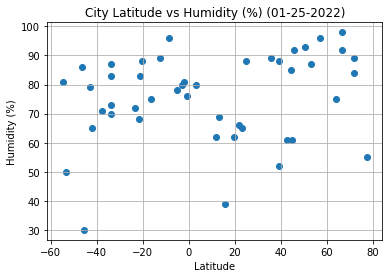

In [16]:
#Scatter plot of latitude versus humidity
scatter("Lat","Humidity", "Humidity (%)")

#Don't forget to write sentance(s) about every graph!

## Latitude vs. Cloudiness Plot

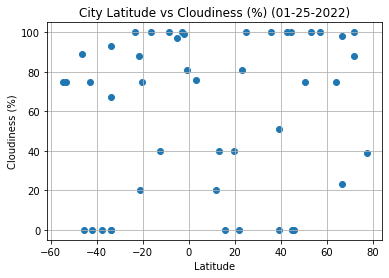

In [17]:
#Scatter plot of latitude versus cloudiness
scatter("Lat", "Cloudiness", "Cloudiness (%)")

#Don't forget to write sentance(s) about every graph!

## Latitude vs. Wind Speed Plot

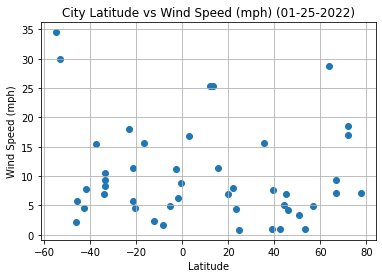

In [18]:
#Scatter plot of latitude versus wind speed
scatter("Lat", "Wind Speed", "Wind Speed (mph)")

#Don't forget to write sentance(s) about every graph!

## Linear Regression

In [19]:
#Split clean_city_data by hemisphere - northern where lat > 0, southern where lat < 0
northern_city = clean_city_data.loc[clean_city_data["Lat"] >= 0]
southern_city = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

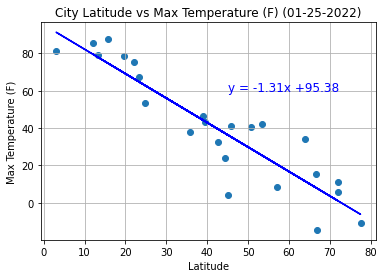

The r squared value is: 0.8296626695321854


In [21]:
#Linear regression function
def linreg(df, y_column, ylabel, x_loc, y_loc, hemisphere):
    #x- and y- values
    x_values = df["Lat"]
    y_values = df[y_column]
    
    #Get regression values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    #Line equation
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    #Plot scatter plot and linear regression
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"b")
    plt.annotate(line_eq, (x_loc,y_loc),fontsize=12,color="b")
    
    #Labels
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.title(f"""City Latitude vs {ylabel} ({df.iloc[0,8].strftime('%m-%d-%Y')})""")
    plt.grid()
    plt.savefig(f"../output_data/{hemisphere}_{y_column}.png")
    plt.show()
    
    #Print r-value
    print(f"The r squared value is: {rvalue**2}")
    
#Linear regression for max temp and latitude in northern hemisphere
linreg(northern_city, "Max Temp", "Max Temperature (F)", 45, 60, "Northern")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

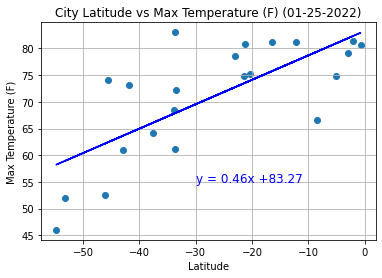

The r squared value is: 0.523848900275723


In [22]:
#Southern hemisphere latitude vs max temp linear regression
linreg(southern_city, "Max Temp", "Max Temperature (F)", -30, 55, "Southern")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

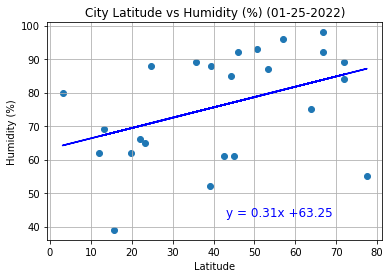

The r squared value is: 0.16743307565823679


In [24]:
#Northern hemisphere latitude vs humidity linear regression
linreg(northern_city, "Humidity", "Humidity (%)", 43, 43, "Northern")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

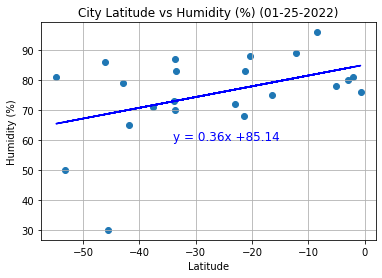

The r squared value is: 0.18882999086457763


In [25]:
#Southern hemisphere latitude vs humidity linear regression
linreg(southern_city, "Humidity", "Humidity (%)", -34, 60, "Southern")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

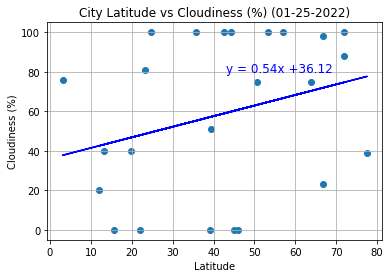

The r squared value is: 0.08382296943194872


In [26]:
#Northern hemisphere latitude vs cloudiness linear regression
linreg(northern_city, "Cloudiness", "Cloudiness (%)", 43, 80, "Northern")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

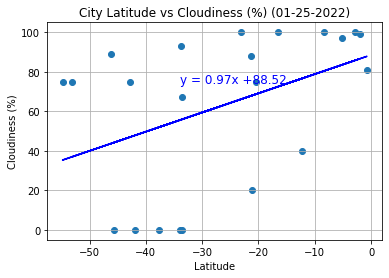

The r squared value is: 0.17297259526735873


In [27]:
#Southern hemisphere latitude vs cloudiness linear regression
linreg(southern_city, "Cloudiness", "Cloudiness (%)", -34, 74, "Southern")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

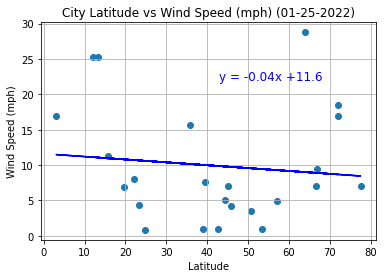

The r squared value is: 0.011412206682570666


In [29]:
#Northern hemisphere latitude vs cloudiness linear regression
linreg(northern_city, "Wind Speed", "Wind Speed (mph)", 43, 22, "Northern")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

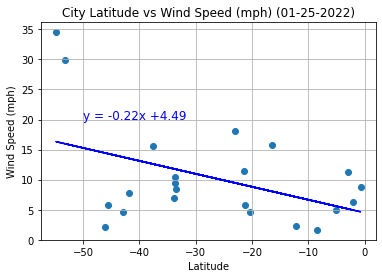

The r squared value is: 0.19313942804298015


In [30]:
#Southern hemisphere latitude vs cloudiness linear regression
linreg(southern_city, "Wind Speed", "Wind Speed (mph)", -50, 20, "Southern")